Original code found in:
https://discuss.pytorch.org/t/neural-net-to-approximate-a-sine-function/101647

# Sin Fit

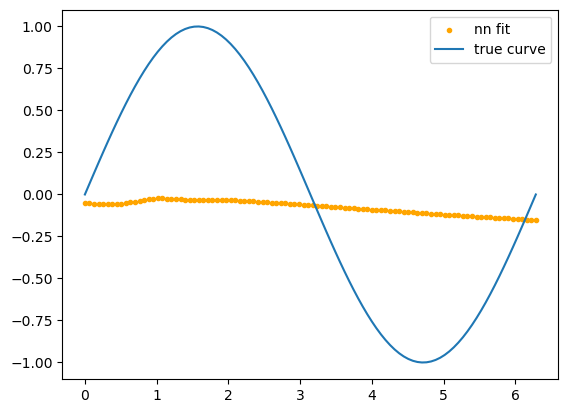

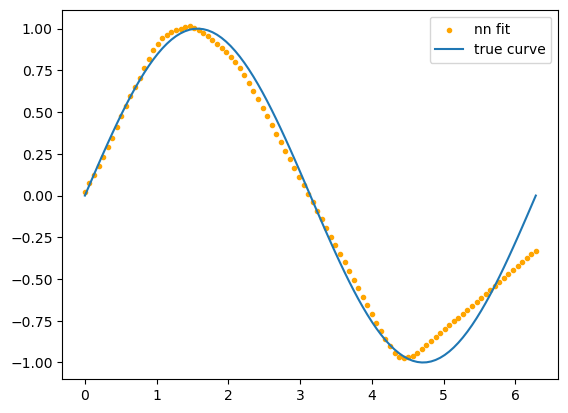

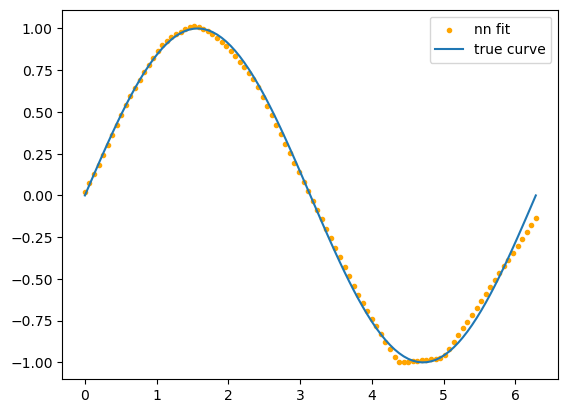

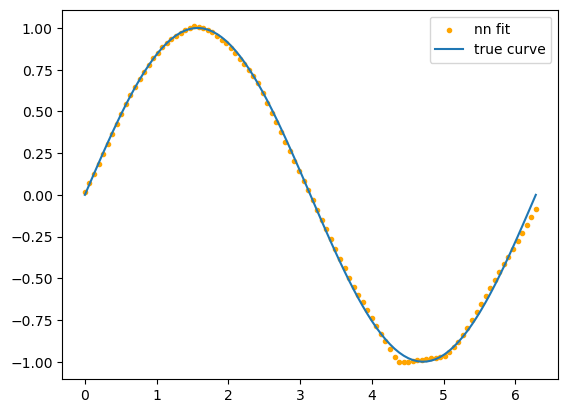

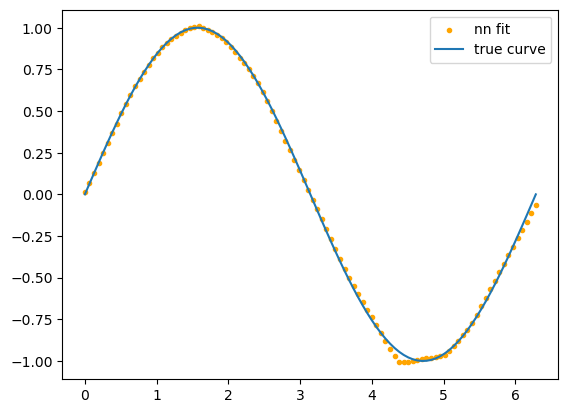

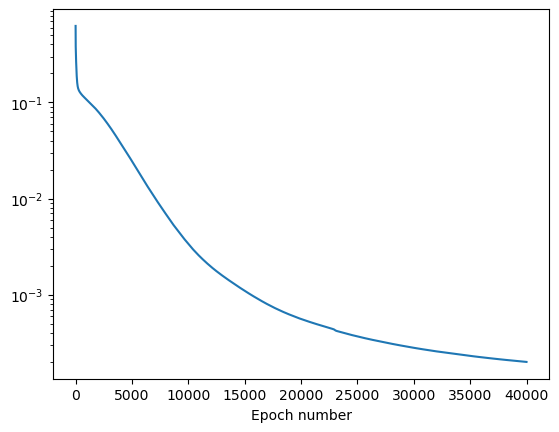

In [16]:
import numpy as np
import math
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt

myseed = 44
np.random.seed(myseed)



data_size = 100

shape = (data_size,1)
x = 2*np.pi*torch.rand(shape)
lr = 2e-3

n_epochs = 40000
plot_every = n_epochs/5
y = np.sin(x)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = x.float().to(device)
y_train_tensor = y.float().to(device)

torch.manual_seed(myseed)

hidden = 200
hidden2 = 200

model = nn.Sequential(
  nn.Linear(1, hidden),
  nn.ReLU(),
  nn.Linear(hidden, hidden2),
  nn.ReLU(),
  nn.Linear(hidden2,1),
  
).to(device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []

# Axes for plotting progress
x_axis = (np.linspace(0,2*np.pi,data_size)).reshape(data_size,1)
x_axis_torch = torch.from_numpy(x_axis).float().to(device)

#Train
for epoch in range(n_epochs):

    model.train()
    yhat = model(x_train_tensor)
    
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss)

    if (epoch % plot_every)==0:
        fit = model(x_axis_torch).cpu().detach().numpy()
        curve = ( np.sin(x_axis_torch.cpu())) .detach().numpy()
        
        plt.scatter(x_axis, fit, marker=".", c = "orange", label = "nn fit")
        plt.plot(x_axis, curve, label = "true curve")
        plt.legend()
        plt.show()

losses_plot=[]
for i in losses:
    losses_plot.append(i.detach().numpy().item())

plt.plot(losses_plot)
plt.xlabel("Epoch number")
plt.yscale("log")
plt.show()

# Circle Fit

In [14]:
losses.pop().detach().numpy().item()

3.6681285564554855e-05

In [ ]:
myseed = 45
np.random.seed(myseed)


data_size = 500

shape = (data_size,1)
t = 2*np.pi*torch.rand(shape)
lr = 2e-3

n_epochs = 1000
plot_every = n_epochs/5
x = np.cos(t)
y = np.sin(t)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

t_train_tensor = t.float().to(device)
x_train_tensor = x.float().to(device)
y_train_tensor = y.float().to(device)

torch.manual_seed(myseed)
hidden = 400
hidden2 = 400

model = nn.Sequential(
  nn.Linear(1, hidden),
  torch.sin(),
  nn.Linear(hidden, hidden2),
  torch.sin(),
  nn.Linear(hidden2,2),
  
).to(device)

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []

# variables for ploting results
t_axis = (np.linspace(0,2*np.pi,data_size)).reshape(data_size,1)
t_axis_torch = torch.from_numpy(t_axis).float().to(device)

# For each epoch...
for epoch in range(n_epochs):

    model.train()
    xhat = model(t_train_tensor)[:,:1]
    yhat = model(t_train_tensor)[:,1:2]
    
    loss = loss_fn(y_train_tensor, yhat) + loss_fn(x_train_tensor, xhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss)

    if (epoch % plot_every)==0:
        xfit = model(t_axis_torch)[:,:1].cpu().detach().numpy()
        yfit = model(t_axis_torch)[:,1:2].cpu().detach().numpy()
        xcurve = ( np.cos(t_axis_torch.cpu())) .detach().numpy()
        ycurve = ( np.sin(t_axis_torch.cpu())) .detach().numpy()
        
        plt.scatter(xfit, yfit, marker=".", c = "orange", label = "nn fit")
        plt.plot(xcurve, ycurve, label = "true curve")
        plt.legend()
        plt.show()

plt.plot(losses)
plt.xlabel("Epoch number")
plt.yscale("log")
plt.show()

# Custom Loss Function

In [7]:
import numpy as np
import math
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
from siren_pytorch import SirenNet

#Generate Data and set parameters
data_size = 200

shape = (data_size,1)
x = 2*np.pi*torch.rand(shape)
lr = 1e-1

n_epochs = 500
plot_every = n_epochs/5
y = np.sin(x)


#Set up tensors
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = x.float().to(device)
y_train_tensor = y.float().to(device)

myseed = 45
np.random.seed(myseed)
torch.manual_seed(myseed)

#Define Model
model = SirenNet(
    dim_in = 1,                        
    dim_hidden = 20,                  
    dim_out = 1,                       
    num_layers = 2,                    
    final_activation = nn.Identity(),   
    w0_initial = 1.0                   
).to(device)

#Set Training functions
def mse_loss(input, target):
    return ((input - target) ** 2).sum() / input.data.nelement()

#def custom_loss(y_actual, y_pred):
    #x = torch.autograd.Variable(x_train_tensor,requires_grad=True)
    #y = model(x)
    #torch.autograd.grad(y, x, create_graph=True)[0]

optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []

# Axes for plotting progress
x_axis = (np.linspace(0,2*np.pi,data_size)).reshape(data_size,1)
x_axis_torch = torch.from_numpy(x_axis).float().to(device)

#Train
for epoch in range(n_epochs):

    model.train()
    yhat = model(x_train_tensor)
    
    loss = mse_loss(y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss)

    if (epoch % plot_every)==0:
        fit = model(x_axis_torch).cpu().detach().numpy()
        curve = ( np.sin(x_axis_torch.cpu())) .detach().numpy()
        
        plt.scatter(x_axis, fit, marker=".", c = "orange", label = "nn fit")
        plt.plot(x_axis, curve, label = "true curve")
        plt.legend()
        plt.show()

plt.plot(losses)
plt.xlabel("Epoch number")
plt.yscale("log")
plt.show()


TypeError: 'bool' object is not callable

In [2]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/3f/14/e105b8ef6d324e789c1589e95cb0ab63f3e07c2216d68b1178b7c21b7d2a/torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 7.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
Note: you may need to restart the kernel to use updated packages.
